## Problem 4

In [93]:
### Summary table (a, b) = (1, 1)

In [94]:
## adopting a=1, b=1

In [95]:
import pandas as pd
import numpy as np
from scipy.stats import binom
from scipy.stats import beta
import seaborn as sns
import matplotlib.pyplot as plt
fname = 'ArtHistBooks.csv'

In [96]:
df = pd.read_csv(fname)

In [97]:
df

,ArtBooks,HistoryBooks,TableBooks,Purchase
0,0,0,1,0
1,0,1,0,0
2,0,0,0,0
3,1,0,1,0
4,1,1,1,0
...,...,...,...,...
995,1,1,0,1
996,0,1,0,0
997,1,0,1,0
998,1,1,0,0


In [98]:
df.ArtBooks

0      0
1      0
2      0
3      1
4      1
      ..
995    1
996    0
997    1
998    1
999    0
Name: ArtBooks, Length: 1000, dtype: int64

In [99]:
def posterior_from_conjugate_prior(**kwargs):
    if kwargs['Likelihood_Dist_Type'] == 'Binomial':
        # Get the parameters for the likelihood and prior distribution from the key word arguments.
        x = kwargs['x'] # possible values for p, range across [0, 1]
        n = kwargs['n'] # number of trials (number of customers)
        k = kwargs['k'] # number of successes (purchases)
        a = kwargs['a'] # alpha parameters on the prior
        b = kwargs['b'] # beta parameter on the prior
        
        print(f'a_prime = {k + a}.')
        print(f'b_prime = {n - k + b}.')
        Likelihood = binom.pmf(p=x, n=n, k=k)
        Prior = beta.pdf(x=x, a=a, b=b)
        Posterior = beta.pdf(x=x, a=k+a, b=n-k+b)
        
        return [Prior, Likelihood, Posterior]
                    
    else:
        print('Distribution type not supported.')    

## Prior: Artbooks

a_prime = 302.
b_prime = 700.


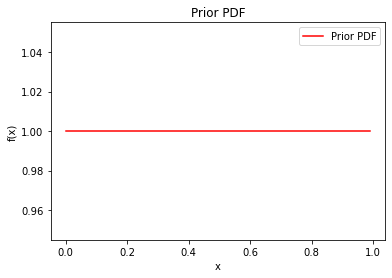

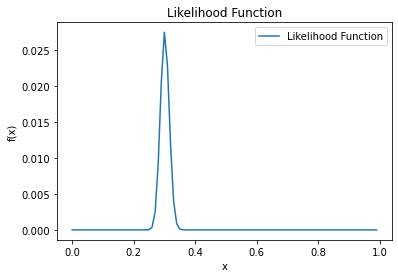

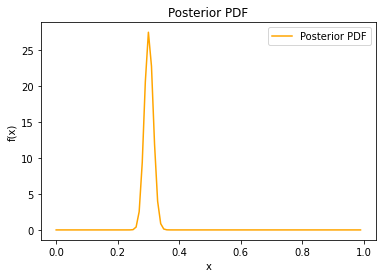

In [100]:
import numpy as np
x = np.arange(0, 1, 0.01)
num_trials= len(df.ArtBooks) #num_trials = 1000
num_successes = np.sum(df.ArtBooks > 0)

Prior, Likelihood, Posterior = posterior_from_conjugate_prior(
    Likelihood_Dist_Type='Binomial', 
    x=x, 
    n=num_trials, 
    k=num_successes, 
    a=1, 
    b=1)    

ax1 = sns.lineplot(x, Prior, color='red')
ax1.set(xlabel='x', ylabel='f(x)', title=f'Prior PDF');
plt.legend(labels=['Prior PDF']);
plt.show()

ax2 = sns.lineplot(x, Likelihood)
ax2.set(xlabel='x', ylabel='f(x)', title=f'Likelihood Function');
plt.legend(labels=['Likelihood Function']);
plt.show()

ax3 = sns.lineplot(x, Posterior, color='orange')
ax3.set(xlabel='x', ylabel='f(x)', title=f'Posterior PDF');
plt.legend(labels=['Posterior PDF']);
plt.show()

In [101]:
art_weight = np.argmax(Posterior)
art_weight

30

## Prior: HistoryBooks

a_prime = 544.
b_prime = 458.


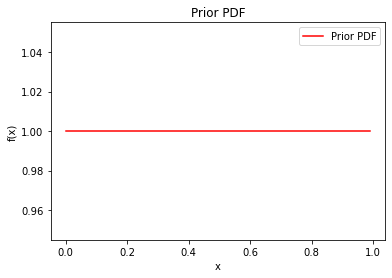

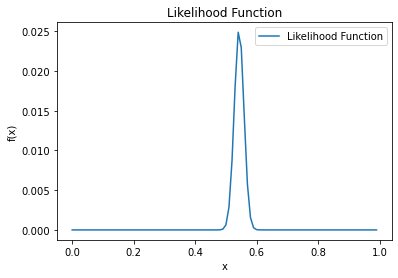

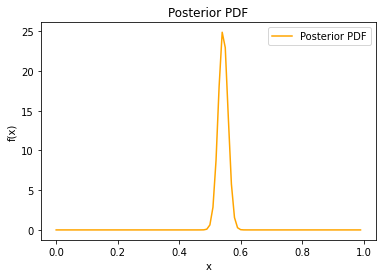

In [102]:
import numpy as np
x = np.arange(0, 1, 0.01)
num_trials= len(df.HistoryBooks) #num_trials = 1000
num_successes = np.sum(df.HistoryBooks > 0)

Prior, Likelihood, Posterior = posterior_from_conjugate_prior(
    Likelihood_Dist_Type='Binomial', 
    x=x, 
    n=num_trials, 
    k=num_successes, 
    a=1, 
    b=1)    

ax1 = sns.lineplot(x, Prior, color='red')
ax1.set(xlabel='x', ylabel='f(x)', title=f'Prior PDF');
plt.legend(labels=['Prior PDF']);
plt.show()

ax2 = sns.lineplot(x, Likelihood)
ax2.set(xlabel='x', ylabel='f(x)', title=f'Likelihood Function');
plt.legend(labels=['Likelihood Function']);
plt.show()

ax3 = sns.lineplot(x, Posterior, color='orange')
ax3.set(xlabel='x', ylabel='f(x)', title=f'Posterior PDF');
plt.legend(labels=['Posterior PDF']);
plt.show()

In [103]:
h_weight = np.argmax(Posterior)
h_weight

54

## Prior: TableBooks

a_prime = 381.
b_prime = 621.


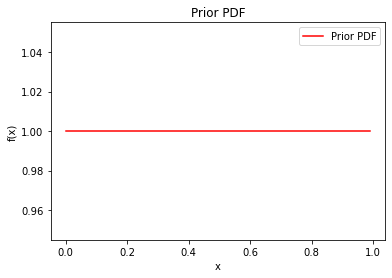

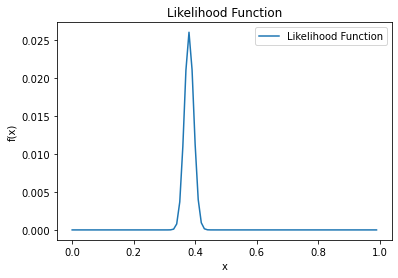

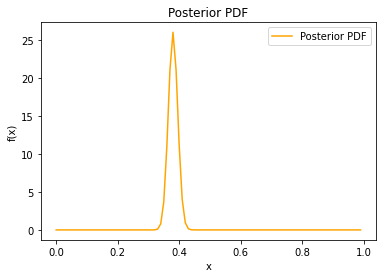

In [104]:
import numpy as np
x = np.arange(0, 1, 0.01)
num_trials= len(df.TableBooks) #num_trials = 1000
num_successes = np.sum(df.TableBooks > 0)

Prior, Likelihood, Posterior = posterior_from_conjugate_prior(
    Likelihood_Dist_Type='Binomial', 
    x=x, 
    n=num_trials, 
    k=num_successes, 
    a=1, 
    b=1)    

ax1 = sns.lineplot(x, Prior, color='red')
ax1.set(xlabel='x', ylabel='f(x)', title=f'Prior PDF');
plt.legend(labels=['Prior PDF']);
plt.show()

ax2 = sns.lineplot(x, Likelihood)
ax2.set(xlabel='x', ylabel='f(x)', title=f'Likelihood Function');
plt.legend(labels=['Likelihood Function']);
plt.show()

ax3 = sns.lineplot(x, Posterior, color='orange')
ax3.set(xlabel='x', ylabel='f(x)', title=f'Posterior PDF');
plt.legend(labels=['Posterior PDF']);
plt.show()

In [105]:
t_weight = np.argmax(Posterior)
t_weight

38

In [106]:
num_trials = len(df[(df["ArtBooks"] == 0) & (df["HistoryBooks"] == 0) & (df["TableBooks"] == 0)])

## Prior: Artboks and HistoryBooks

a_prime = 172.
b_prime = 157.


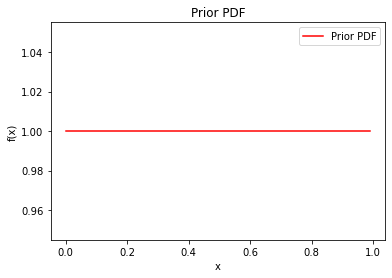

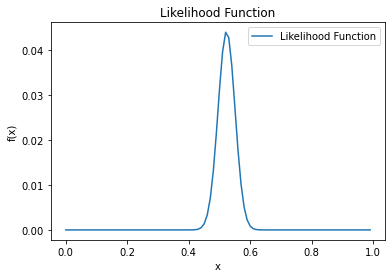

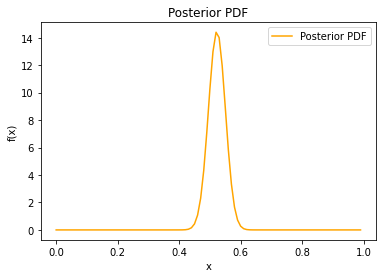

In [107]:
import numpy as np
x = np.arange(0, 1, 0.01)
num_trials = len(df[(df["ArtBooks"] == 0) & (df["HistoryBooks"] == 0)]) #num_trials = 1000
num_successes = np.sum((df.ArtBooks > 0) & (df.HistoryBooks))

Prior, Likelihood, Posterior = posterior_from_conjugate_prior(
    Likelihood_Dist_Type='Binomial', 
    x=x, 
    n=num_trials, 
    k=num_successes, 
    a=1, 
    b=1)    

ax1 = sns.lineplot(x, Prior, color='red')
ax1.set(xlabel='x', ylabel='f(x)', title=f'Prior PDF');
plt.legend(labels=['Prior PDF']);
plt.show()

ax2 = sns.lineplot(x, Likelihood)
ax2.set(xlabel='x', ylabel='f(x)', title=f'Likelihood Function');
plt.legend(labels=['Likelihood Function']);
plt.show()

ax3 = sns.lineplot(x, Posterior, color='orange')
ax3.set(xlabel='x', ylabel='f(x)', title=f'Posterior PDF');
plt.legend(labels=['Posterior PDF']);
plt.show()

In [108]:
ah_weight = np.argmax(Posterior)
ah_weight

52

## Prior: Artboks and TableBooks

a_prime = 126.
b_prime = 320.


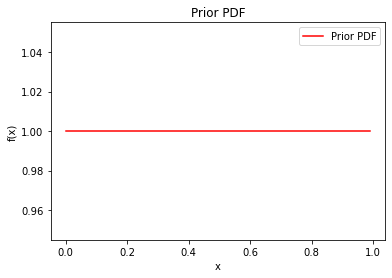

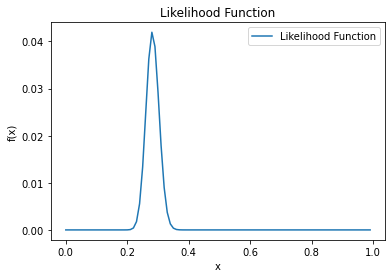

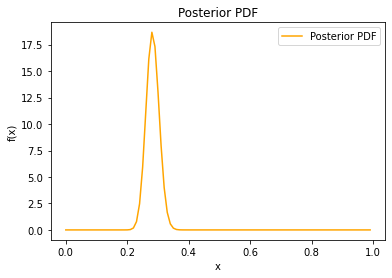

In [109]:
import numpy as np
x = np.arange(0, 1, 0.01)
num_trials= len(df[(df["ArtBooks"] == 0)  & (df["TableBooks"] == 0)])#num_trials = 1000
num_successes = np.sum((df.ArtBooks > 0) & (df.TableBooks))

Prior, Likelihood, Posterior = posterior_from_conjugate_prior(
    Likelihood_Dist_Type='Binomial', 
    x=x, 
    n=num_trials, 
    k=num_successes, 
    a=1, 
    b=1)    

ax1 = sns.lineplot(x, Prior, color='red')
ax1.set(xlabel='x', ylabel='f(x)', title=f'Prior PDF');
plt.legend(labels=['Prior PDF']);
plt.show()

ax2 = sns.lineplot(x, Likelihood)
ax2.set(xlabel='x', ylabel='f(x)', title=f'Likelihood Function');
plt.legend(labels=['Likelihood Function']);
plt.show()

ax3 = sns.lineplot(x, Posterior, color='orange')
ax3.set(xlabel='x', ylabel='f(x)', title=f'Posterior PDF');
plt.legend(labels=['Posterior PDF']);
plt.show()

In [110]:
at_weight = np.argmax(Posterior)
at_weight

28

## Prior: HistoryBooks and TableBooks

a_prime = 193.
b_prime = 78.


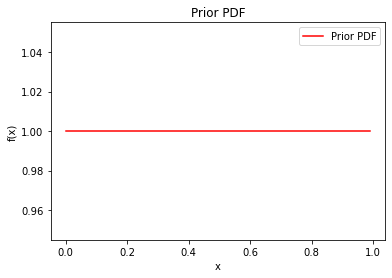

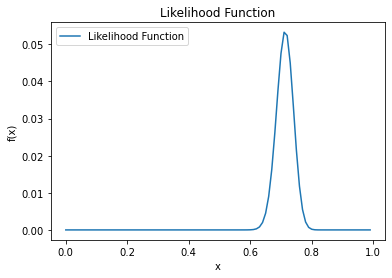

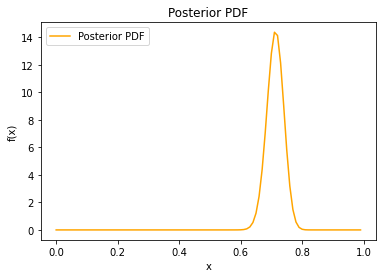

In [111]:
import numpy as np
x = np.arange(0, 1, 0.01)
num_trials= len(df[(df["HistoryBooks"] == 0) & (df["TableBooks"] == 0)]) #num_trials = 1000
num_successes = np.sum((df.HistoryBooks > 0) & (df.TableBooks > 0 ))

Prior, Likelihood, Posterior = posterior_from_conjugate_prior(
    Likelihood_Dist_Type='Binomial', 
    x=x, 
    n=num_trials, 
    k=num_successes, 
    a=1, 
    b=1)    

ax1 = sns.lineplot(x, Prior, color='red')
ax1.set(xlabel='x', ylabel='f(x)', title=f'Prior PDF');
plt.legend(labels=['Prior PDF']);
plt.show()

ax2 = sns.lineplot(x, Likelihood)
ax2.set(xlabel='x', ylabel='f(x)', title=f'Likelihood Function');
plt.legend(labels=['Likelihood Function']);
plt.show()

ax3 = sns.lineplot(x, Posterior, color='orange')
ax3.set(xlabel='x', ylabel='f(x)', title=f'Posterior PDF');
plt.legend(labels=['Posterior PDF']);
plt.show()

In [112]:
ht_weight = np.argmax(Posterior)
ht_weight

71

## Prior: ArtBooks and HistoryBooks and TableBooks

a_prime = 72.
b_prime = 123.


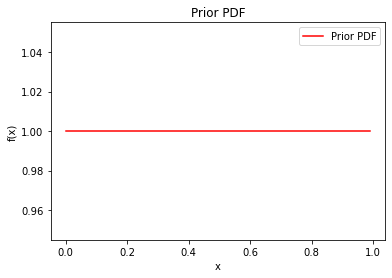

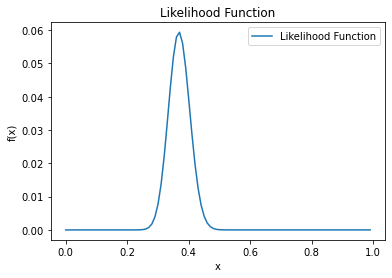

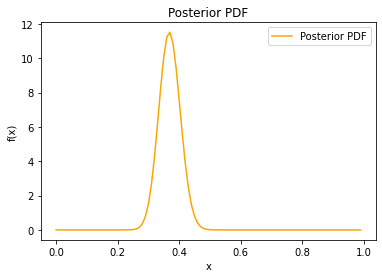

In [113]:
import numpy as np
x = np.arange(0, 1, 0.01)
num_trials= len(df[(df["ArtBooks"] == 0) & (df["HistoryBooks"] == 0) & (df["TableBooks"] == 0)]) #num_trials = 1000
num_successes = np.sum((df.HistoryBooks > 0) & (df.TableBooks > 0) & (df.ArtBooks > 0) )

Prior, Likelihood, Posterior = posterior_from_conjugate_prior(
    Likelihood_Dist_Type='Binomial', 
    x=x, 
    n=num_trials, 
    k=num_successes, 
    a=1, 
    b=1)    

ax1 = sns.lineplot(x, Prior, color='red')
ax1.set(xlabel='x', ylabel='f(x)', title=f'Prior PDF');
plt.legend(labels=['Prior PDF']);
plt.show()

ax2 = sns.lineplot(x, Likelihood)
ax2.set(xlabel='x', ylabel='f(x)', title=f'Likelihood Function');
plt.legend(labels=['Likelihood Function']);
plt.show()

ax3 = sns.lineplot(x, Posterior, color='orange')
ax3.set(xlabel='x', ylabel='f(x)', title=f'Posterior PDF');
plt.legend(labels=['Posterior PDF']);
plt.show()

In [114]:
aht_weight = np.argmax(Posterior)
aht_weight

37

In [115]:
## a = 1, b= 100

## Prior: Artbooks

a_prime = 302.
b_prime = 799.


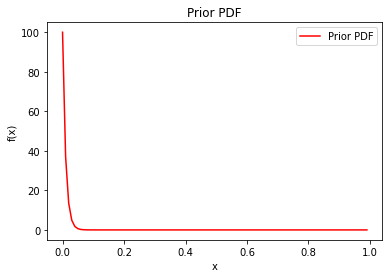

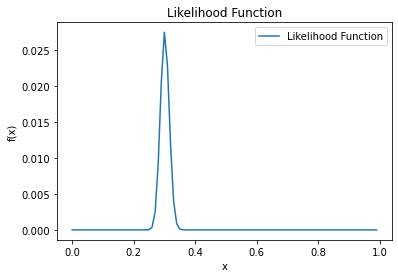

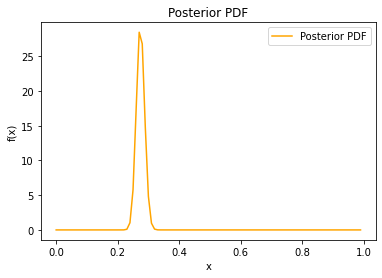

In [116]:
import numpy as np
x = np.arange(0, 1, 0.01)
num_trials= len(df.ArtBooks) #num_trials = 1000
num_successes = np.sum(df.ArtBooks > 0)

Prior, Likelihood, Posterior = posterior_from_conjugate_prior(
    Likelihood_Dist_Type='Binomial', 
    x=x, 
    n=num_trials, 
    k=num_successes, 
    a=1, 
    b=100)    

ax1 = sns.lineplot(x, Prior, color='red')
ax1.set(xlabel='x', ylabel='f(x)', title=f'Prior PDF');
plt.legend(labels=['Prior PDF']);
plt.show()

ax2 = sns.lineplot(x, Likelihood)
ax2.set(xlabel='x', ylabel='f(x)', title=f'Likelihood Function');
plt.legend(labels=['Likelihood Function']);
plt.show()

ax3 = sns.lineplot(x, Posterior, color='orange')
ax3.set(xlabel='x', ylabel='f(x)', title=f'Posterior PDF');
plt.legend(labels=['Posterior PDF']);
plt.show()

In [117]:
art_weight_s = np.argmax(Posterior)
art_weight_s

27

## Prior: HistoryBooks

a_prime = 544.
b_prime = 557.


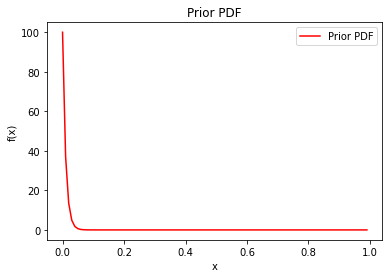

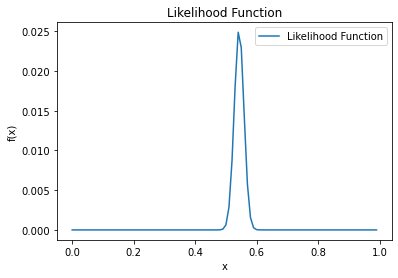

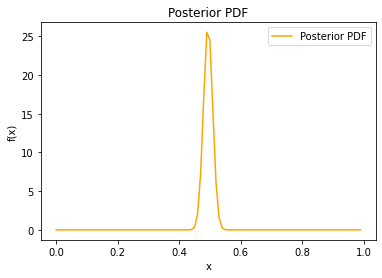

In [118]:
import numpy as np
x = np.arange(0, 1, 0.01)
num_trials= len(df.HistoryBooks) #num_trials = 1000
num_successes = np.sum(df.HistoryBooks > 0)

Prior, Likelihood, Posterior = posterior_from_conjugate_prior(
    Likelihood_Dist_Type='Binomial', 
    x=x, 
    n=num_trials, 
    k=num_successes, 
    a=1, 
    b=100)    

ax1 = sns.lineplot(x, Prior, color='red')
ax1.set(xlabel='x', ylabel='f(x)', title=f'Prior PDF');
plt.legend(labels=['Prior PDF']);
plt.show()

ax2 = sns.lineplot(x, Likelihood)
ax2.set(xlabel='x', ylabel='f(x)', title=f'Likelihood Function');
plt.legend(labels=['Likelihood Function']);
plt.show()

ax3 = sns.lineplot(x, Posterior, color='orange')
ax3.set(xlabel='x', ylabel='f(x)', title=f'Posterior PDF');
plt.legend(labels=['Posterior PDF']);
plt.show()

In [119]:
h_weight_s = np.argmax(Posterior)
h_weight_s

49

## Prior: TableBooks

a_prime = 381.
b_prime = 720.


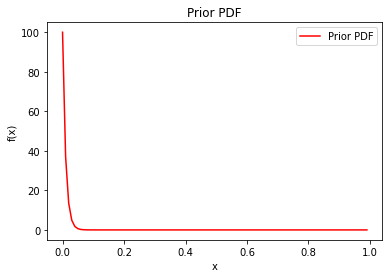

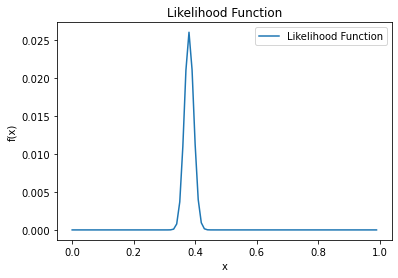

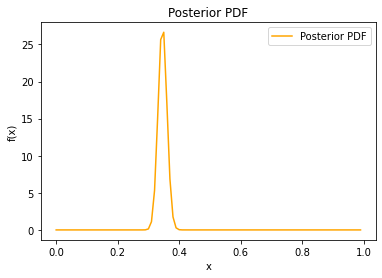

In [120]:
import numpy as np
x = np.arange(0, 1, 0.01)
num_trials= len(df.TableBooks) #num_trials = 1000
num_successes = np.sum(df.TableBooks > 0)

Prior, Likelihood, Posterior = posterior_from_conjugate_prior(
    Likelihood_Dist_Type='Binomial', 
    x=x, 
    n=num_trials, 
    k=num_successes, 
    a=1, 
    b=100)    

ax1 = sns.lineplot(x, Prior, color='red')
ax1.set(xlabel='x', ylabel='f(x)', title=f'Prior PDF');
plt.legend(labels=['Prior PDF']);
plt.show()

ax2 = sns.lineplot(x, Likelihood)
ax2.set(xlabel='x', ylabel='f(x)', title=f'Likelihood Function');
plt.legend(labels=['Likelihood Function']);
plt.show()

ax3 = sns.lineplot(x, Posterior, color='orange')
ax3.set(xlabel='x', ylabel='f(x)', title=f'Posterior PDF');
plt.legend(labels=['Posterior PDF']);
plt.show()

In [121]:
t_weight_s = np.argmax(Posterior)
t_weight_s

35

## Prior: Artboks and HistoryBooks

a_prime = 172.
b_prime = 256.


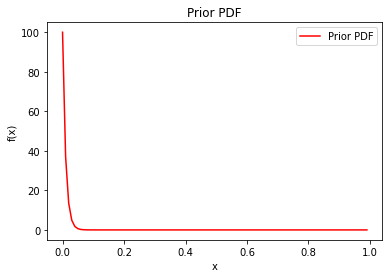

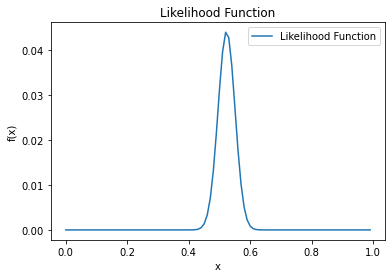

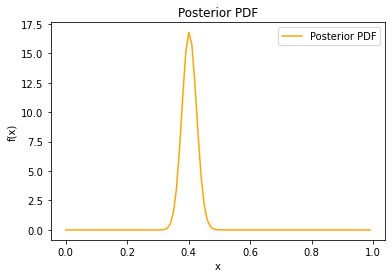

In [122]:
import numpy as np
x = np.arange(0, 1, 0.01)
num_trials= len(df[(df["ArtBooks"] == 0) & (df["HistoryBooks"] == 0)]) #num_trials = 1000
num_successes = np.sum((df.ArtBooks > 0) & (df.HistoryBooks))

Prior, Likelihood, Posterior = posterior_from_conjugate_prior(
    Likelihood_Dist_Type='Binomial', 
    x=x, 
    n=num_trials, 
    k=num_successes, 
    a=1, 
    b=100)    

ax1 = sns.lineplot(x, Prior, color='red')
ax1.set(xlabel='x', ylabel='f(x)', title=f'Prior PDF');
plt.legend(labels=['Prior PDF']);
plt.show()

ax2 = sns.lineplot(x, Likelihood)
ax2.set(xlabel='x', ylabel='f(x)', title=f'Likelihood Function');
plt.legend(labels=['Likelihood Function']);
plt.show()

ax3 = sns.lineplot(x, Posterior, color='orange')
ax3.set(xlabel='x', ylabel='f(x)', title=f'Posterior PDF');
plt.legend(labels=['Posterior PDF']);
plt.show()

In [123]:
ah_weight_s = np.argmax(Posterior)
ah_weight_s

40

## Prior: Artboks and TableBooks

a_prime = 126.
b_prime = 419.


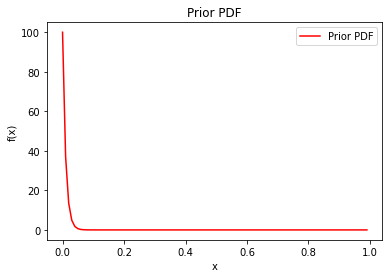

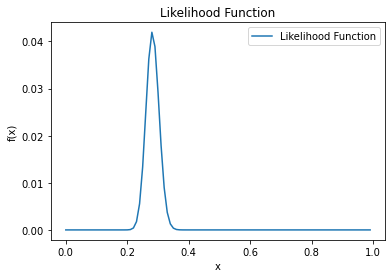

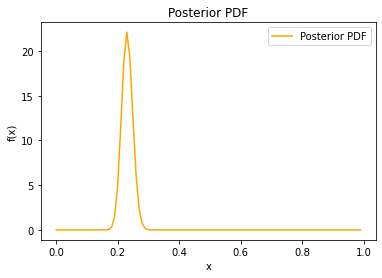

In [124]:
import numpy as np
x = np.arange(0, 1, 0.01)
num_trials= len(df[(df["ArtBooks"] == 0) & (df["TableBooks"] == 0)]) #num_trials = 1000
num_successes = np.sum((df.ArtBooks > 0) & (df.TableBooks))

Prior, Likelihood, Posterior = posterior_from_conjugate_prior(
    Likelihood_Dist_Type='Binomial', 
    x=x, 
    n=num_trials, 
    k=num_successes, 
    a=1, 
    b=100)    

ax1 = sns.lineplot(x, Prior, color='red')
ax1.set(xlabel='x', ylabel='f(x)', title=f'Prior PDF');
plt.legend(labels=['Prior PDF']);
plt.show()

ax2 = sns.lineplot(x, Likelihood)
ax2.set(xlabel='x', ylabel='f(x)', title=f'Likelihood Function');
plt.legend(labels=['Likelihood Function']);
plt.show()

ax3 = sns.lineplot(x, Posterior, color='orange')
ax3.set(xlabel='x', ylabel='f(x)', title=f'Posterior PDF');
plt.legend(labels=['Posterior PDF']);
plt.show()

In [125]:
at_weight_s = np.argmax(Posterior)
at_weight_s

23

## Prior: HistoryBooks and TableBooks

a_prime = 193.
b_prime = 177.


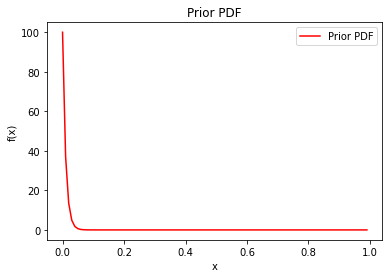

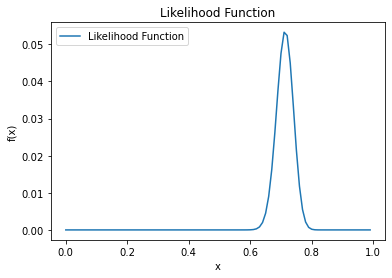

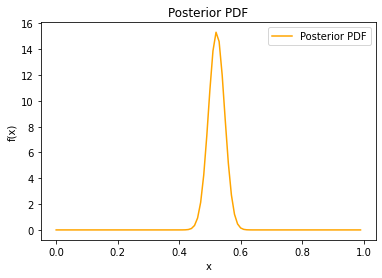

In [126]:
import numpy as np
x = np.arange(0, 1, 0.01)
num_trials= len(df[ (df["HistoryBooks"] == 0) & (df["TableBooks"] == 0)]) #num_trials = 1000
num_successes = np.sum((df.HistoryBooks > 0) & (df.TableBooks > 0 ))

Prior, Likelihood, Posterior = posterior_from_conjugate_prior(
    Likelihood_Dist_Type='Binomial', 
    x=x, 
    n=num_trials, 
    k=num_successes, 
    a=1, 
    b=100)    

ax1 = sns.lineplot(x, Prior, color='red')
ax1.set(xlabel='x', ylabel='f(x)', title=f'Prior PDF');
plt.legend(labels=['Prior PDF']);
plt.show()

ax2 = sns.lineplot(x, Likelihood)
ax2.set(xlabel='x', ylabel='f(x)', title=f'Likelihood Function');
plt.legend(labels=['Likelihood Function']);
plt.show()

ax3 = sns.lineplot(x, Posterior, color='orange')
ax3.set(xlabel='x', ylabel='f(x)', title=f'Posterior PDF');
plt.legend(labels=['Posterior PDF']);
plt.show()

In [127]:
ht_weight_s = np.argmax(Posterior)
ht_weight_s

52

## Prior: ArtBooks and HistoryBooks and TableBooks

a_prime = 72.
b_prime = 222.


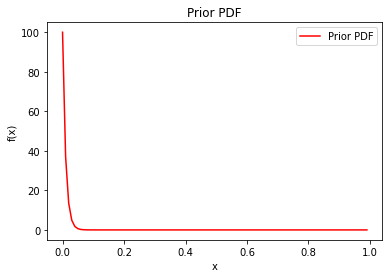

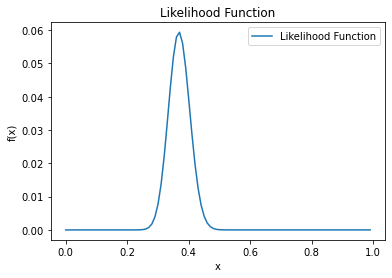

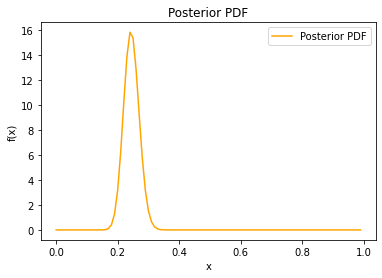

In [128]:
import numpy as np
x = np.arange(0, 1, 0.01)
num_trials= len(df[(df["ArtBooks"] == 0) & (df["HistoryBooks"] == 0) & (df["TableBooks"] == 0)]) #num_trials = 1000
num_successes = np.sum((df.HistoryBooks > 0) & (df.TableBooks > 0) & (df.ArtBooks > 0) )

Prior, Likelihood, Posterior = posterior_from_conjugate_prior(
    Likelihood_Dist_Type='Binomial', 
    x=x, 
    n=num_trials, 
    k=num_successes, 
    a=1, 
    b=100)    

ax1 = sns.lineplot(x, Prior, color='red')
ax1.set(xlabel='x', ylabel='f(x)', title=f'Prior PDF');
plt.legend(labels=['Prior PDF']);
plt.show()

ax2 = sns.lineplot(x, Likelihood)
ax2.set(xlabel='x', ylabel='f(x)', title=f'Likelihood Function');
plt.legend(labels=['Likelihood Function']);
plt.show()

ax3 = sns.lineplot(x, Posterior, color='orange')
ax3.set(xlabel='x', ylabel='f(x)', title=f'Posterior PDF');
plt.legend(labels=['Posterior PDF']);
plt.show()

In [129]:
aht_weight_s = np.argmax(Posterior)
aht_weight_s

24

In [130]:
data = {'MaxPosterior':['Art', 'His', 'Tab', 'ArtHis', 'HisTab', 'ArtTab', 'ArtHisTab'],\
        'a:b =1:1':[30, 54, 38, 52, 28, 71, 37] , 'a:b =1:100':[27, 49, 35, 40, 23, 52, 24]} 

In [131]:
df = pd.DataFrame(data) 
df

,MaxPosterior,a:b =1:1,a:b =1:100
0,Art,30,27
1,His,54,49
2,Tab,38,35
3,ArtHis,52,40
4,HisTab,28,23
5,ArtTab,71,52
6,ArtHisTab,37,24


## Response:
<br>When we use strong weighting for low likelihood, i.e. a: b = 1:100,
<br>We can see the maximum posterior shift to the lower values for all case. 
<br> This is consistent the undestanding of posteior equation is the propotional factor of likelihood. 
<br> I use a:b = 1:1 and a:b = 1:100 for this exercise, the posterior of beta function a:b = 1:100 is smaller that of a:b =1:1.
<br> This is consitent to our understanding of likelihood.

## Problem 5

**From the lecture slide f(m|w) = N(µ0, vw), V>0**
<br>**f(w) is Wishart with α degrees of freedom and**
<br>**precision matrix r, with α > k − 1**
<br>**Likelihood: N(M, W)**
<br>**Posterior: f(m|x, w) ∼ N (µ ,(v + N)w)**
<br>**Posterior: f(w|x) is Wishart with α + N degrees of**
<br>**freedom & precision matrix r**
<br> **Posterior f(m|x) is a multivariate t distribution with  α + N − k + 1** 
<br> **location parameter, µ∗ and precision (v + N)(α + N − k + 1)(r∗)−1**
<br>**In our case, we have 8 variables, meaning k = 8, Prior α = 8+1 = 9. v is 462 for this case. This is multivariate** 
<br>**Gaussian with unknown mean & variance-covariance matrix. Meahwhile, f(w) is Wishart with multiple dimensions of the** <br>**gamma distribution.**

In [132]:
import numpy as np 
import pandas as pd
chd_data = pd.read_csv("CHDdata.csv")
chd_data.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


In [133]:
#drop "famhist" column
chd_data = chd_data.drop(columns= "famhist")
#check that it worked
chd_data.head()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,60,25.99,57.34,49,1


In [134]:
for key in chd_data.keys()[0:8]:
    print("Standardizing "+key+".")
    chd_data[key] = chd_data[key] - np.mean(chd_data[key])
    chd_data[key] = chd_data[key] / np.std(chd_data[key])

Standardizing sbp.
Standardizing tobacco.
Standardizing ldl.
Standardizing adiposity.
Standardizing typea.
Standardizing obesity.
Standardizing alcohol.
Standardizing age.


In [135]:
# Check that it worked
chd_data.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,462.000000
mean,-2.571296e-16,5.022437e-16,-3.963040e-15,1.559599e-15,1.153478e-17,-5.286776e-15,-4.169344e-16,1.970526e-17,0.346320
std,1.001084e+00,1.001084e+00,1.001084e+00,1.001084e+00,1.001084e+00,1.001084e+00,1.001084e+00,1.001084e+00,0.476313
min,-1.823123e+00,-7.924170e-01,-1.817753e+00,-2.401708e+00,-4.089354e+00,-2.695129e+00,-6.969825e-01,-1.906103e+00,0.000000
25%,-6.997535e-01,-7.809742e-01,-7.047170e-01,-7.245926e-01,-6.224081e-01,-7.267824e-01,-6.761275e-01,-8.096968e-01,0.000000
50%,-2.113321e-01,-3.565020e-01,-1.935182e-01,9.112757e-02,-1.059418e-02,-5.680824e-02,-3.898822e-01,1.496582e-01,0.000000
75%,4.724579e-01,4.063492e-01,5.074164e-01,7.489145e-01,7.031887e-01,5.828745e-01,2.800340e-01,8.349118e-01,1.000000
max,3.891408e+00,6.007857e+00,5.119082e+00,2.197976e+00,2.538631e+00,4.878906e+00,5.321938e+00,1.451640e+00,1.000000


In [136]:
chd_positive = chd_data[chd_data.chd == 1]
chd_negative = chd_data[chd_data.chd == 0]

In [137]:
# Check that it worked
chd_positive.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.0
mean,0.264268,0.411771,0.361398,0.349128,0.141722,0.137517,0.085909,0.512414,1.0
std,1.156458,1.212965,1.075607,0.908099,1.044840,1.043288,1.070602,0.729735,0.0
min,-1.774281,-0.792417,-1.542213,-2.060752,-3.375571,-2.695129,-0.696983,-1.769052,1.0
25%,-0.528806,-0.465481,-0.386879,-0.250150,-0.545931,-0.572356,-0.677559,-0.004524,1.0
50%,-0.015964,0.107747,0.156949,0.385765,0.193344,0.102370,-0.356351,0.697861,1.0
75%,0.985300,0.994834,0.890513,1.052558,0.805158,0.649991,0.308250,1.109013,1.0
max,3.891408,6.007857,4.553501,2.197976,2.538631,4.674587,5.321938,1.451640,1.0


In [138]:
# Lets check the mean of each class to get a first look at the seperation
print("Mean for CHD Positive:")
print(np.array([chd_positive.mean()[0:8]]))
print("Mean for CHD Negative:")
print(np.array([chd_negative.mean()[0:8]]))

Mean for CHD Positive:
[[0.26426823 0.41177089 0.36139839 0.34912802 0.14172199 0.13751694
  0.0859086  0.51241433]]
Mean for CHD Negative:
[[-0.14000966 -0.21815676 -0.19146935 -0.18496849 -0.0750845  -0.07285666
  -0.04551449 -0.27147779]]


In [139]:
chd_positive

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
0,1.058564,1.823073,0.478412,-0.295503,-0.418470,-0.176786,3.277738,0.629336,1
1,0.277089,-0.790237,-0.159680,0.412140,0.193344,0.671373,-0.612745,1.383115,1
3,1.546985,0.842264,0.807126,1.624141,-0.214532,1.412621,0.295062,1.040488,1
4,-0.211332,2.171805,-0.599577,0.305351,0.703189,-0.012856,1.647775,0.423760,1
7,-1.188175,0.096850,-0.072667,-1.390421,0.907127,-0.697085,-0.422187,1.040488,1
...,...,...,...,...,...,...,...,...,...
453,-0.699754,-0.443685,1.198683,1.836434,-1.744067,1.296207,-0.696983,0.560810,1
454,0.374774,-0.652924,0.038515,0.336230,0.703189,0.490812,-0.360440,-0.261494,1
455,-0.504385,-0.304192,-0.923457,0.138089,-0.520439,-0.495142,1.242125,-1.083798,1
458,2.133091,0.123004,-0.159680,0.861173,-0.112563,0.609602,0.068519,0.629336,1


In [140]:
chd_negative_new = chd_negative.iloc[ : ,[0,1, 2, 3, 4, 5, 6, 7]]

In [141]:
chd_positive_new = chd_positive.iloc[ : ,[0,1, 2, 3, 4, 5, 6, 7]]

In [142]:
## For patients withouot chd
v = 462
alpha = 9 
k = 8
xmean = np.mean(chd_negative_new)
N = len(chd_negative_new)
mu0 = np.zeros(8)
mu_star = (v*mu0+ N *xmean)/(v+N)
print("the posterior mean for patients without CHD is:\n", mu_star)

the posterior mean for patients without CHD is:
 sbp         -0.055344
tobacco     -0.086235
ldl         -0.075686
adiposity   -0.073116
typea       -0.029680
obesity     -0.028799
alcohol     -0.017991
age         -0.107312
dtype: float64


In [143]:
## S-matrix:
S_matrix = pd.DataFrame(0, index=chd_negative_new.columns, columns = chd_negative_new.columns)
for index, row in chd_negative_new.iterrows():
    tmp = (row-xmean).to_frame()
    tmpT=tmp.T
    each_i = tmp.dot(tmpT)
    S_matrix+=each_i

In [144]:
S_matrix

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
sbp,232.260049,38.244868,36.897715,108.277837,-19.633118,79.008160,42.595168,107.072330
tobacco,38.244868,186.564280,49.194077,77.992896,4.809790,39.289941,44.962429,111.987969
ldl,36.897715,49.194077,246.079082,110.856114,2.591264,85.059945,10.736726,85.897294
adiposity,108.277837,77.992896,110.856114,301.046673,-26.657035,207.981738,61.931813,202.736423
typea,-19.633118,4.809790,2.591264,-26.657035,283.505089,9.629805,25.318168,-36.878619
obesity,79.008160,39.289941,85.059945,207.981738,9.629805,284.307565,42.598878,100.765087
alcohol,42.595168,44.962429,10.736726,61.931813,25.318168,42.598878,277.949377,45.104219
age,107.072330,111.987969,85.897294,202.736423,-36.878619,100.765087,45.104219,313.062062


In [145]:
mu0_xmean = (-xmean).to_frame().dot((-xmean).to_frame().T)

In [146]:
r_star = np.eye(8)+Smatrix+mu0_xmean*v*N/(v+N)
print("Posterior precision matrix is:\n")
r_star

Posterior precision matrix is:



,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
sbp,217.225808,38.755896,17.754005,38.571500,-14.158151,23.946275,17.735802,46.335853
tobacco,38.755896,243.625445,-4.576305,26.616119,-22.851166,7.285175,40.968083,55.234929
ldl,17.754005,-4.576305,191.647090,68.207638,7.847611,58.016730,-32.176979,22.319061
adiposity,38.571500,26.616119,68.207638,138.366582,-2.849924,113.776741,-21.383196,51.836311
typea,-14.158151,-22.851166,7.847611,-2.849924,175.608281,20.789706,-9.426105,-24.578114
obesity,23.946275,7.285175,58.016730,113.776741,20.789706,175.033026,-21.036718,20.400289
alcohol,17.735802,40.968083,-32.176979,-21.383196,-9.426105,-21.036718,183.622480,-6.903003
age,46.335853,55.234929,22.319061,51.836311,-24.578114,20.400289,-6.903003,99.128881


In [147]:
## Degree of freedom
alpha+len(chd_negative_new)
## Posterior marginal alpha+N-k+1
alpha+N-k+1
## Parameter
param = (v+N)*(alpha+N-k+1)
## r_star inversion
r_star_inv.dot(r_star)

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
sbp,1.069377,0.108618,0.020314,-0.000588,-0.019139,-0.052472,0.050636,0.085350
tobacco,0.151827,1.543612,-0.184024,0.047481,-0.164963,0.000047,0.192738,0.149879
ldl,0.015897,-0.216758,0.816598,0.071226,0.012547,0.046530,-0.085224,-0.025689
adiposity,-0.130916,-0.088725,0.097584,0.569991,0.091600,0.094388,-0.213406,-0.071258
typea,-0.011122,-0.158342,0.022480,0.022370,0.633017,0.049156,-0.120558,-0.050050
obesity,-0.076090,0.037253,-0.028544,0.064939,0.020501,0.625602,-0.012682,-0.001009
alcohol,-0.057739,-0.030678,-0.119325,-0.188493,-0.086557,-0.163993,0.692124,-0.088249
age,-0.176169,-0.350871,-0.142269,-0.240033,0.000619,-0.164768,-0.056321,0.278358


In [148]:
## Given by the lecture, Posterior f(m|x) is multivariaate t distribution with alpha+N-k+1 and location parameter u* (mu_star)\
## and precision (v+N)(allpha+N-k+1)(r_star)_inv
## r_star_posterior
r_star_posterior = param*r_star_inv
r_star_posterior 

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
sbp,1253.888388,10.451143,21.292419,-175.786542,43.504717,-119.126753,-97.938426,-276.347333
tobacco,10.451143,1611.998553,-153.425600,-20.656145,-93.254071,51.280758,-165.824903,-551.809764
ldl,21.292419,-153.425600,1144.366556,-313.173423,-53.211475,-87.417415,73.113516,-68.656640
adiposity,-175.786542,-20.656145,-313.173423,2737.489658,167.903060,-1438.041061,-182.268326,-1109.369643
typea,43.504717,-93.254071,-53.211475,167.903060,856.879146,-150.444767,-96.075750,75.267817
obesity,-119.126753,51.280758,-87.417415,-1438.041061,-150.444767,1781.554879,12.410417,393.331393
alcohol,-97.938426,-165.824903,73.113516,-182.268326,-96.075750,12.410417,911.752285,47.379280
age,-276.347333,-551.809764,-68.656640,-1109.369643,75.267817,393.331393,47.379280,1625.410336


In [149]:
## ## For patients with chd
v = 462
alpha = 9 
k = 8
xmean = np.mean(chd_positive_new)
N = len(chd_positive_new)
mu0 = np.zeros(8)
mu_star = (v*mu0+ N *xmean)/(v+N)
print("the posterior mean for patients with CHD is:\n", mu_star)

the posterior mean for patients with CHD is:
 sbp          0.067979
tobacco      0.105922
ldl          0.092964
adiposity    0.089808
typea        0.036456
obesity      0.035374
alcohol      0.022099
age          0.131811
dtype: float64


In [150]:
## S-matrix:
S_matrix = pd.DataFrame(0, index=chd_positive_new.columns, columns = chd_positive_new.columns)
for index, row in chd_positive_new.iterrows():
    tmp = (row-xmean).to_frame()
    tmpT=tmp.T
    each_i = tmp.dot(tmpT)
    S_matrix+=each_i

In [151]:
S_matrix

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
sbp,212.645903,33.177849,12.858328,33.842043,-16.077986,22.083404,16.572042,39.394441
tobacco,33.177849,233.933981,-12.204530,19.246891,-25.842566,4.382533,39.154765,44.419132
ldl,12.858328,-12.204530,183.952036,61.739898,5.222153,55.469172,-33.768471,12.826375
adiposity,33.842043,19.246891,61.739898,131.118438,-5.386242,111.315680,-22.920653,42.665925
typea,-16.077986,-25.842566,5.222153,-5.386242,173.578711,19.790684,-10.050207,-28.300661
obesity,22.083404,4.382533,55.469172,111.315680,19.790684,173.063646,-21.642302,16.788195
alcohol,16.572042,39.154765,-33.768471,-22.920653,-10.050207,-21.642302,182.244164,-9.159525
age,39.394441,44.419132,12.826375,42.665925,-28.300661,16.788195,-9.159525,84.669529


In [152]:
mu0_xmean = (-xmean).to_frame().dot((-xmean).to_frame().T)

In [153]:
r_star = np.eye(8)+Smatrix+mu0_xmean*v*N/(v+N)
print("Posterior precision matrix is:\n")
r_star

Posterior precision matrix is:



,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
sbp,221.945586,46.110041,24.208508,44.806855,-11.627025,26.402300,19.270112,55.487470
tobacco,46.110041,255.084343,5.480811,36.331770,-18.907279,11.112042,43.358776,69.494567
ldl,24.208508,5.480811,200.473905,76.734760,11.309037,61.375451,-30.078742,34.834298
adiposity,44.806855,36.331770,76.734760,146.604188,0.493978,117.021426,-19.356200,63.926624
typea,-11.627025,-18.907279,11.309037,0.493978,176.965676,22.106825,-8.603283,-19.670277
obesity,26.402300,11.112042,61.375451,117.021426,22.106825,176.311064,-20.238310,25.162505
alcohol,19.270112,43.358776,-30.078742,-19.356200,-8.603283,-20.238310,184.121255,-3.927986
age,55.487470,69.494567,34.834298,63.926624,-19.670277,25.162505,-3.927986,116.873804


In [154]:
## Degree of freedom
alpha+len(chd_positive_new)
## Posterior marginal alpha+N-k+1
alpha+N-k+1
## Parameter
param = (v+N)*(alpha+N-k+1)
## r_star inversion
r_star_inv.dot(r_star)

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
sbp,1.078740,0.123206,0.033117,0.011781,-0.014118,-0.047600,0.053680,0.103504
tobacco,0.174951,1.579642,-0.152401,0.078030,-0.152562,0.012080,0.200255,0.194716
ldl,0.031140,-0.193008,0.837443,0.091364,0.020721,0.054462,-0.080269,0.003866
adiposity,-0.128646,-0.085188,0.100688,0.572990,0.092817,0.095570,-0.212668,-0.066857
typea,-0.000083,-0.141142,0.037576,0.036953,0.638937,0.054900,-0.116970,-0.028646
obesity,-0.085143,0.023147,-0.040925,0.052978,0.015646,0.620891,-0.015625,-0.018563
alcohol,-0.060867,-0.035552,-0.123603,-0.192625,-0.088234,-0.165621,0.691108,-0.094314
age,-0.161610,-0.328185,-0.122358,-0.220798,0.008427,-0.157191,-0.051588,0.306588


In [155]:
## Given by the lecture, Posterior f(m|x) is multivariaate t distribution with alpha+N-k+1 and location parameter u* (mu_star)\
## and precision (v+N)(allpha+N-k+1)(r_star)_inv
## r_star_posterior
r_star_posterior = param*r_star_inv
r_star_posterior 

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
sbp,543.998043,4.534216,9.237692,-76.264790,18.874472,-51.683006,-42.490474,-119.892974
tobacco,4.534216,699.363729,-66.563521,-8.961645,-40.458172,22.248098,-71.942945,-239.402035
ldl,9.237692,-66.563521,496.482122,-135.869932,-23.085738,-37.925945,31.720215,-29.786605
adiposity,-76.264790,-8.961645,-135.869932,1187.656758,72.844551,-623.892470,-79.076905,-481.298751
typea,18.874472,-40.458172,-23.085738,72.844551,371.756038,-65.270290,-41.682354,32.654856
obesity,-51.683006,22.248098,-37.925945,-623.892470,-65.270290,772.925547,5.384245,170.646375
alcohol,-42.490474,-71.942945,31.720215,-79.076905,-41.682354,5.384245,395.562686,20.555446
age,-119.892974,-239.402035,-29.786605,-481.298751,32.654856,170.646375,20.555446,705.182415


## Problem 7

In [156]:
from scipy.stats import beta
from scipy.stats import norm

def posterior_from_conjugate_prior(**kwargs):
    if kwargs['Likelihood_Dist_Type'] == 'Binomial':
        # Get the parameters for the likelihood and prior distribution from the key word arguments.
        x = kwargs['x']
        n = kwargs['n']
        k = kwargs['k']
        a = kwargs['a']
        b = kwargs['b']
        
        print(f'a_prime = {k + a}.')
        print(f'b_prime = {n - k + b}.')
        Likelihood = binom.pmf(p=x, n=n, k=k)
        Prior = beta.pdf(x=x, a=a, b=b)
        Posterior = beta.pdf(x=x, a=k+a, b=n-k+b)
        
        return [Prior, Likelihood, Posterior]
    
    elif kwargs['Likelihood_Dist_Type'] == 'Gaussian_Known_Variance':
        # Get the parameters for the likelihood and prior distribution from the key word arguments.
        x = kwargs['x']
        n= len(x)
        mu = kwargs['mu']
        var = kwargs['var']
        prior_mu = kwargs['prior_mu']
        prior_var = kwargs['prior_var']
        print(kwargs)

        
        # To answer the challenge question, modify this section with the correct formulas
        x_bar = np.mean(x)
        mu_prime = (prior_mu*var + n*x_bar*prior_var)/(var+n*prior_var)
        var_prime =(prior_var*var)/(var+n*prior_var)
        print(f'mu_prime = {mu_prime:.2f}.')
        print(f'var_prime = {var_prime: .2f}.')
        Likelihood = norm.pdf(x, loc = mu, scale=var**(.5))
        Prior = norm.pdf(x= x, loc = prior_mu, scale = prior_var**(.5))
        Posterior = norm.pdf(x= x, loc = mu_prime, scale = var_prime**(.50))
        
        return [Prior, Likelihood, Posterior]
    
    else:
        print('Distribution type not supported.') 
        return -1, -1, -1

In [157]:
import numpy as np
x = np.arange(-5, 80, 0.01)
Prior, Likelihood, Posterior = posterior_from_conjugate_prior(Likelihood_Dist_Type='Gaussian_Known_Variance', x=x, mu=50, var=21, prior_mu=0.5, prior_var=1)    

{'Likelihood_Dist_Type': 'Gaussian_Known_Variance', 'x': array([-5.  , -4.99, -4.98, ..., 79.97, 79.98, 79.99]), 'mu': 50, 'var': 21, 'prior_mu': 0.5, 'prior_var': 1}
mu_prime = 37.40.
var_prime =  0.00.


{'Likelihood_Dist_Type': 'Gaussian_Known_Variance', 'x': array([-5.  , -4.99, -4.98, ..., 79.97, 79.98, 79.99]), 'theta': 5, 'n': 100, 'k': 21, 'mu': 50, 'var': 21, 'prior_mu': 0.5, 'prior_var': 1}
mu_prime = 37.40.
var_prime =  0.00.


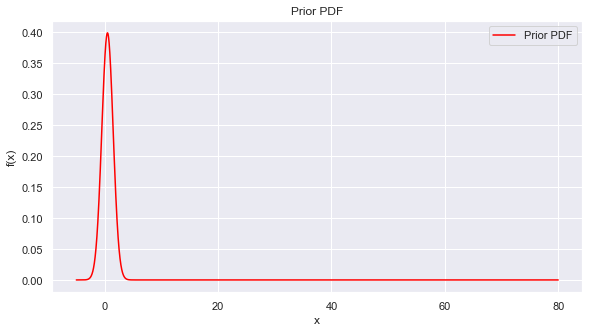

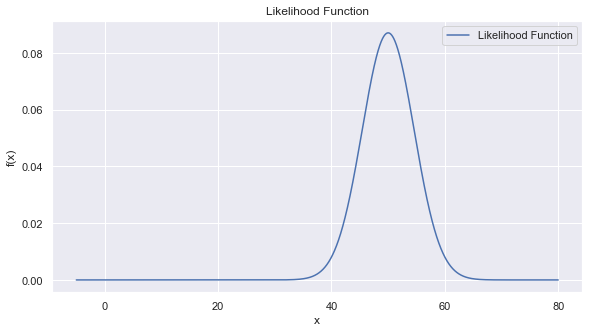

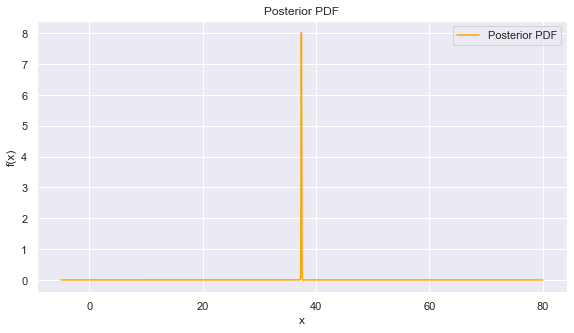

In [158]:
import numpy as np
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(9.5,5)})

x = np.arange(-5, 80, 0.01)
Prior, Likelihood, Posterior = posterior_from_conjugate_prior(Likelihood_Dist_Type='Gaussian_Known_Variance', x=x, theta= 5, n=100, k = 21, mu=50, var=21, prior_mu=0.5, prior_var=1)    

ax1 = sns.lineplot(x, Prior, color='red')
ax1.set(xlabel='x', ylabel='f(x)', title=f'Prior PDF');
plt.legend(labels=['Prior PDF']);
plt.show()

ax2 = sns.lineplot(x, Likelihood)
ax2.set(xlabel='x', ylabel='f(x)', title=f'Likelihood Function');
plt.legend(labels=['Likelihood Function']);
plt.show()

ax3 = sns.lineplot(x, Posterior, color='orange')
ax3.set(xlabel='x', ylabel='f(x)', title=f'Posterior PDF');
plt.legend(labels=['Posterior PDF']);
plt.show()